# Tema 13: Deep learning

In [34]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("itskumar/asl-mnist")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/asl-mnist


In [35]:
import pandas as pd
import tensorflow.keras as keras

# Carga ficheros .csv
train_df = pd.read_csv("/kaggle/input/asl-mnist/sign_mnist_train.csv")
valid_df = pd.read_csv("/kaggle/input/asl-mnist/sign_mnist_valid.csv")

# Extrae los valores objetivo
y_train = train_df['label']
y_valid = valid_df['label']
del train_df['label']
del valid_df['label']

# Separa y normaliza vectores de imágenes
x_train = train_df.values
x_valid = valid_df.values
x_train = x_train / 255
x_valid = x_valid / 255

# Categoriza las salidas
num_classes = 25
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

# Prepara para las CNNs
x_train = x_train.reshape(-1,28,28,1)
x_valid = x_valid.reshape(-1,28,28,1)

In [37]:
print(x_train.shape, x_valid.shape)

# Prepara para las CNNs
x_train = x_train.reshape(-1,28,28,1)
x_valid = x_valid.reshape(-1,28,28,1)

print(x_train.shape, x_valid.shape)

(27455, 28, 28, 1) (7172, 28, 28, 1)
(27455, 28, 28, 1) (7172, 28, 28, 1)


In [39]:
# Creación del modelo
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Input, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, Dense
)

model = Sequential()
model.add(Input(shape=(28, 28, 1)))  # Uso explícito de Input
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=num_classes, activation="softmax"))

In [40]:
# Data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
        # Límite de rotación aleatoria en grados
    zoom_range=0.1,
        # Zoom aleatorio entre 1-zoom_range y 1+zoom_range
    width_shift_range=0.1,
        # Desplazamiento horizontal aleatorio (fracción del ancho)
    height_shift_range=0.1,
        # Desplazamiento vertical aleatorio (fracción del ancho)
    horizontal_flip=True,
        # Reflexión horizontal aleatoria
    vertical_flip=False,
        # No reflexión vertical aleatoria
) 


# El generador es creado y acoplado al conjunto de entrenamiento
img_iter = datagen.flow(x_train, y_train)
datagen.fit(x_train)

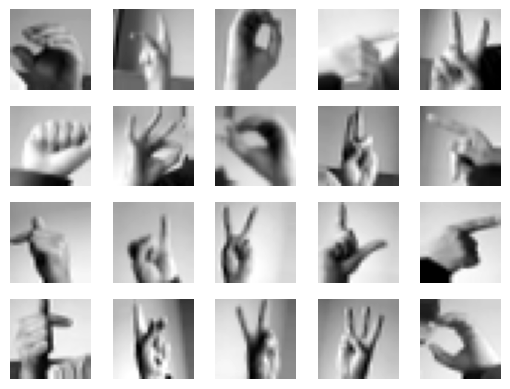

In [41]:
# Muestra el tipo de imágenes que genera
import matplotlib.pyplot as plt
import numpy as np
x, y = next(img_iter)
fig, ax = plt.subplots(nrows=4, ncols=5)
for i in range(20):
    image = x[i]
    ax.flatten()[i].imshow(np.squeeze(image), cmap='gray')
    ax.flatten()[i].axis('off')


In [42]:
# Compila y entrena el modelo
model.compile(loss="categorical_crossentropy", metrics=["accuracy"])

# model.fit(x_train, y_train, epochs=20,  validation_data=(x_valid, y_valid))
model.fit(img_iter, epochs=20, validation_data=(x_valid, y_valid))

# Grabamos el modelo
model.save('asl_model.keras')

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


858/858 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.4675 - loss: 1.7781 - val_accuracy: 0.8249 - val_loss: 0.5077
Epoch 2/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8796 - loss: 0.3489 - val_accuracy: 0.8572 - val_loss: 0.5018
Epoch 3/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9287 - loss: 0.2100 - val_accuracy: 0.9598 - val_loss: 0.1005
Epoch 4/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9480 - loss: 0.1594 - val_accuracy: 0.7839 - val_loss: 0.7529
Epoch 5/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9593 - loss: 0.1272 - val_accuracy: 0.6571 - val_loss: 1.8749
Epoch 6/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9650 - loss: 0.1065 - val_accuracy: 0.9205 - val_loss: 0.2803
Epoch 7/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9702 - loss: 0.0904 - val_accuracy: 0.9566 - val_loss: 0.1225
Epoch 8/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9727 - loss: 0.0903 - val_accurac

__Ejercicio: inferencia__

In [43]:
import pandas as pd
import tensorflow.keras as keras

# Carga ficheros .csv
train_df = pd.read_csv("/kaggle/input/asl-mnist/sign_mnist_train.csv")
valid_df = pd.read_csv("/kaggle/input/asl-mnist/sign_mnist_valid.csv")

# Extrae los valores objetivo
y_train = train_df['label']
y_valid = valid_df['label']
del train_df['label']
del valid_df['label']

# Separa y normaliza vectores de imágenes
x_train = train_df.values
x_valid = valid_df.values
x_train = x_train / 255
x_valid = x_valid / 255

# Categoriza las salidas
num_classes = 25
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

# Prepara para las CNNs
x_train = x_train.reshape(-1,28,28,1)
x_valid = x_valid.reshape(-1,28,28,1)

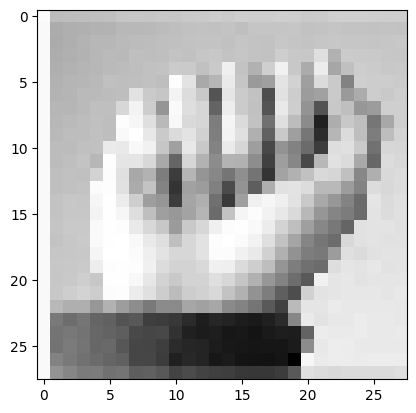

In [44]:
from tensorflow.keras.preprocessing import image as image_utils
image_a = image_utils.load_img('/kaggle/input/asl-mnist/a.png', color_mode="grayscale", target_size=(28,28))
import matplotlib.pyplot as plt
plt.imshow(image_a, cmap='gray')
plt.show()

image_a = image_utils.img_to_array(image_a)
image_a = image_a.reshape(1,28,28,1)
image_a = image_a / 255

In [45]:
prediction = model.predict(image_a)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step
[[1.0000000e+00 1.1032501e-27 7.1265390e-29 2.3243006e-28 1.4467485e-25
  2.8848133e-14 4.6294697e-41 2.7416898e-32 2.5552818e-10 4.8331071e-29
  1.2423021e-27 2.3911934e-21 1.3972368e-13 4.4607395e-32 6.4017550e-28
  5.5616908e-34 2.6764801e-43 3.3750497e-18 8.9930066e-34 1.0657575e-40
  1.9066851e-31 4.1121185e-19 1.9833887e-30 6.1510383e-13 5.5409504e-22]]


In [51]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing import image as image_utils

alphabet = "abcdefghiklmnopqrstuvwxy"
model = keras.models.load_model('asl_model.keras') 
image_file = "/kaggle/input/asl-mnist/a.png"

def predict_letter(file):
    # 1. Cargar y escalar imagen a 28×28 en escala de grises
    img = image_utils.load_img(
        file,
        color_mode='grayscale',
        target_size=(28, 28)
    )
    # 2. Convertir a array
    arr = image_utils.img_to_array(img)
    # 3. Añadir dimensión de batch: (1, 28, 28, 1)
    arr = np.expand_dims(arr, axis=0)
    # 4. Normalizar valores a [0,1]
    arr = arr.astype('float32') / 255.0
    # 5. Hacer predicción
    preds = model.predict(arr)
    # 6. Índice de la clase más probable
    idx = np.argmax(preds, axis=1)[0]
    # 7. Convertir índice a letra
    return alphabet[idx]

print("Prediction:", predict_letter(image_file))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step
Prediction: a
